In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from IPython.display import Image, clear_output
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sns.set()
tf.__version__

'2.17.1'

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
inputs_test, inputs_validation, target_test, target_validation = train_test_split(x_test, y_test , test_size=0.4)

In [10]:
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = inputs_test.reshape(-1, 784)
x_valid_flat = inputs_validation.reshape(-1,784)

In [11]:
inputs = tf.keras.Input(shape=(784,) , name='input_layer')
#flatten_layer = tf.keras.layers.Flatten(name='flatten_layer')(inputs)
encoder_first_layer = tf.keras.layers.Dense(128,activation='relu',name='first_encoder_dense')(inputs)
encoder_second_layer = tf.keras.layers.Dense(8,activation='relu',name='second_encoder_dense')(encoder_first_layer)

decoder_first_layer = tf.keras.layers.Dense(128,activation='relu',name='first_decoder_dense')(encoder_second_layer)
decoder_output_layer = tf.keras.layers.Dense(784,activation='linear')(decoder_first_layer)

In [12]:
autoencoder = tf.keras.Model(inputs, decoder_output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder1_history = autoencoder.fit(x_train_flat, x_train_flat,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_valid_flat, x_valid_flat))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0639 - val_loss: 0.0366
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0357 - val_loss: 0.0327
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0326 - val_loss: 0.0313
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0314 - val_loss: 0.0305
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0306 - val_loss: 0.0300
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0301 - val_loss: 0.0295
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0296 - val_loss: 0.0292
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0293 - val_loss: 0.0288
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0289 - val_loss: 0.0286
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0287 - val_loss: 0.0283
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0285 - val_loss: 0.0281
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

In [13]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_encoder_dense (Dense)          │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_encoder_dense (Dense)         │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_decoder_dense (Dense)          │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 611,402 (2.33 MB)

 Trainable params: 203,800 (796.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,602 (1.55 MB)

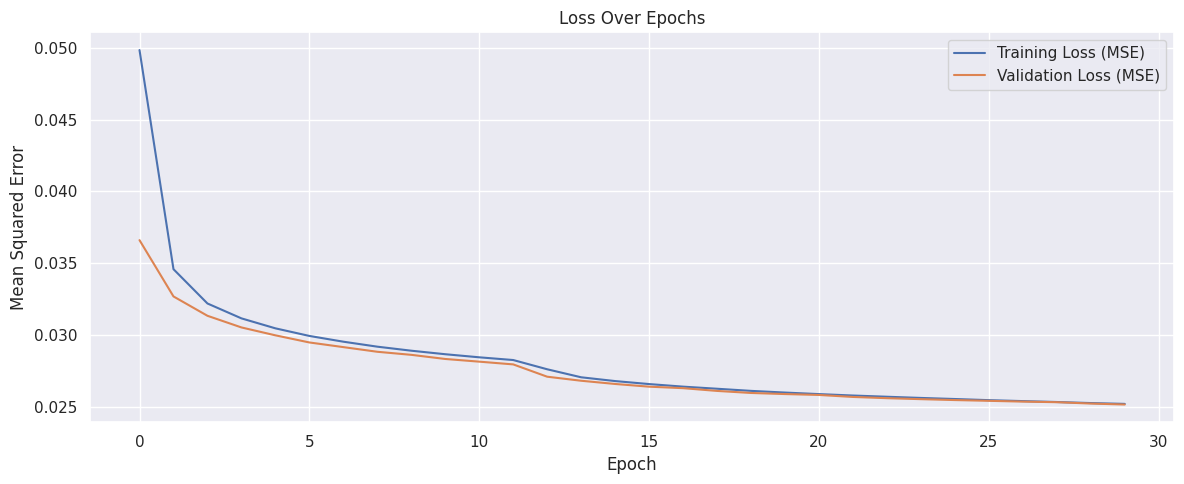

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(autoencoder1_history.history['loss'], label='Training Loss (MSE)')
plt.plot(autoencoder1_history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
x_test_reconstructed = autoencoder.predict(x_test_flat)
mse = mean_squared_error(x_test_flat, x_test_reconstructed)
print(f"Test Set MSE: {mse:.6f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set MSE: 0.025187


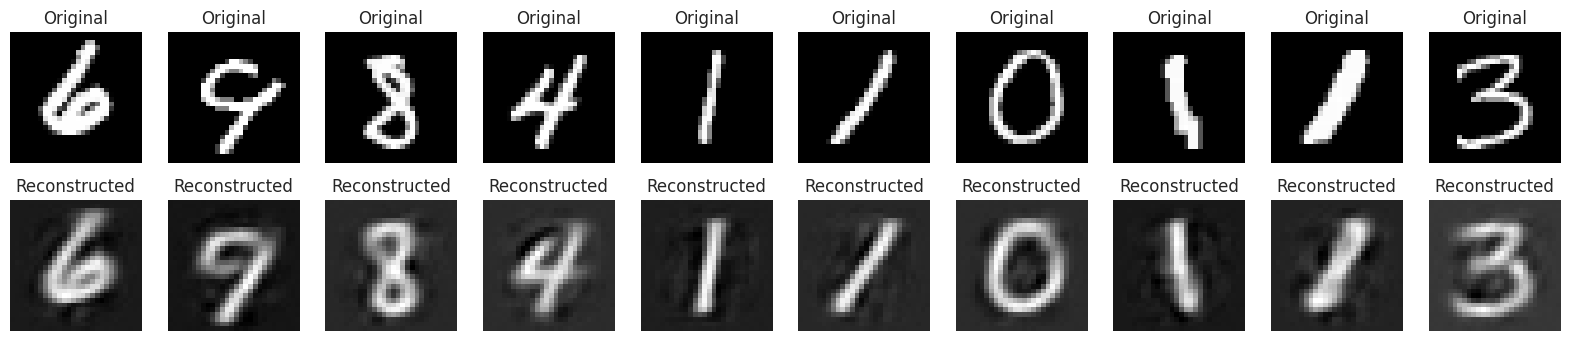

Average MSE across test set: 0.025187
MSE for test image 0: 0.015210
MSE for test image 1: 0.035242
MSE for test image 2: 0.038828
MSE for test image 3: 0.017989
MSE for test image 4: 0.005713
MSE for test image 5: 0.006471
MSE for test image 6: 0.023373
MSE for test image 7: 0.013250
MSE for test image 8: 0.010391
MSE for test image 9: 0.024797


In [16]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
mse_per_image = np.mean((x_test_flat - x_test_reconstructed) ** 2, axis=1)
print(f"Average MSE across test set: {np.mean(mse_per_image):.6f}")
for i in range(n):
    print(f"MSE for test image {i}: {mse_per_image[i]:.6f}")

In [17]:
inputs2 = tf.keras.Input(shape=(784,) , name='input_layer')
#flatten_layer = tf.keras.layers.Flatten(name='flatten_layer')(inputs)
encoder2_first_layer = tf.keras.layers.Dense(128,activation='relu',name='first_encoder_dense')(inputs2)
encoder2_second_layer = tf.keras.layers.Dense(4,activation='relu',name='second_encoder_dense')(encoder2_first_layer)

decoder2_first_layer = tf.keras.layers.Dense(128,activation='relu',name='first_decoder_dense')(encoder2_second_layer)
decoder2_output_layer = tf.keras.layers.Dense(784,activation='linear')(decoder2_first_layer)

In [18]:
autoencoder2 = tf.keras.Model(inputs2, decoder2_output_layer)
autoencoder2.compile(optimizer='adam', loss='mse')
autoencoder2_history = autoencoder2.fit(x_train_flat, x_train_flat,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_valid_flat, x_valid_flat))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0722 - val_loss: 0.0628
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0624 - val_loss: 0.0605
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0585 - val_loss: 0.0507
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0482 - val_loss: 0.0405
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0396 - val_loss: 0.0368
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0368 - val_loss: 0.0356
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0356 - val_loss: 0.0349
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0348 - val_loss: 0.0343
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0343 - val_loss: 0.0339
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0338 - val_loss: 0.0337
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0335 - val_loss: 0.0334
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

In [19]:
autoencoder2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_encoder_dense (Dense)          │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_encoder_dense (Dense)         │ (None, 4)                   │             516 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_decoder_dense (Dense)          │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 608,318 (2.32 MB)

 Trainable params: 202,772 (792.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 405,546 (1.55 MB)

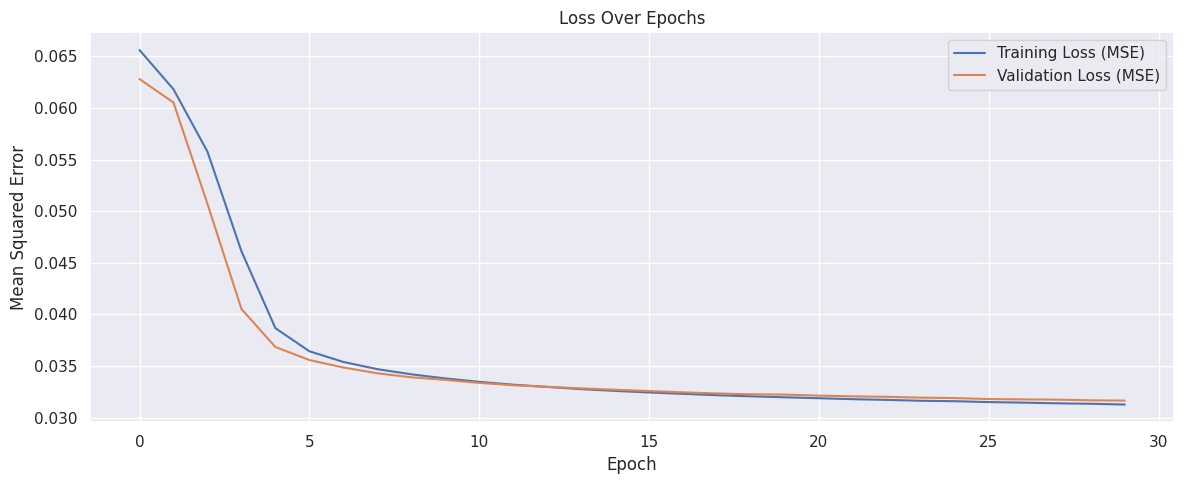

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(autoencoder2_history.history['loss'], label='Training Loss (MSE)')
plt.plot(autoencoder2_history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
x_test_reconstructed = autoencoder2.predict(x_test_flat)
mse = mean_squared_error(x_test_flat, x_test_reconstructed)
print(f"Test Set MSE: {mse:.6f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Set MSE: 0.031521


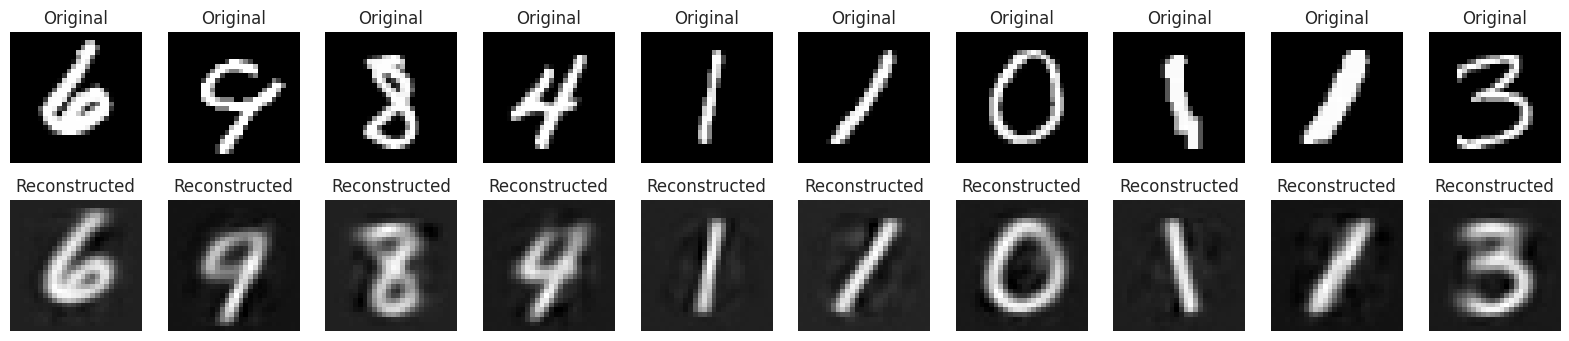

Average MSE across test set: 0.031521
MSE for test image 0: 0.018347
MSE for test image 1: 0.055912
MSE for test image 2: 0.037051
MSE for test image 3: 0.027022
MSE for test image 4: 0.004154
MSE for test image 5: 0.007623
MSE for test image 6: 0.023972
MSE for test image 7: 0.016149
MSE for test image 8: 0.017559
MSE for test image 9: 0.033298


In [22]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
mse_per_image = np.mean((x_test_flat - x_test_reconstructed) ** 2, axis=1)
print(f"Average MSE across test set: {np.mean(mse_per_image):.6f}")
for i in range(n):
    print(f"MSE for test image {i}: {mse_per_image[i]:.6f}")

In [23]:
encoder1 = tf.keras.Model(inputs, encoder_second_layer, name='frozen_encoder')
encoder1.trainable = False
print("Encoder trainable status:", encoder1.trainable)
for layer in encoder1.layers:
    print(f"{layer.name}: {layer.trainable}")
new_inputs = tf.keras.Input(shape=(784,), name='new_input_layer')
encoded_output = encoder1(new_inputs)

Encoder trainable status: False
input_layer: False
first_encoder_dense: False
second_encoder_dense: False


In [24]:
dense1 = tf.keras.layers.Dense(4, activation='relu')(encoded_output)
dense1_output = tf.keras.layers.Dense(10 , activation='softmax')(dense1)

In [25]:
first_feedforward_model = tf.keras.Model(new_inputs, dense1_output, name='first_model_with_frozen_encoder')
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
target_validation_one_hot = tf.keras.utils.to_categorical(target_validation, num_classes=10)
first_feedforward_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
first_fc_history = first_feedforward_model.fit(x_train_flat, y_train_one_hot,
              epochs=30,
              batch_size=256,
              shuffle=True,
              validation_data=(x_valid_flat, target_validation_one_hot))
first_feedforward_model.summary()

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0959 - loss: 3.4861 - val_accuracy: 0.1902 - val_loss: 2.0942
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2624 - loss: 1.9688 - val_accuracy: 0.5190 - val_loss: 1.6401
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5305 - loss: 1.5600 - val_accuracy: 0.5838 - val_loss: 1.3193
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5944 - loss: 1.2543 - val_accuracy: 0.6340 - val_loss: 1.0645
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6541 - loss: 1.0148 - val_accuracy: 0.7055 - val_loss: 0.8852
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7270 - loss: 0.8642 - val_accuracy: 0.7492 - val_loss: 0.7883
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7580 - loss: 0.7750 - val_accuracy: 0.7642 - val_loss: 0.7356
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7677 - loss: 0.7336 - val_accuracy: 0.

Model: "first_model_with_frozen_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ new_input_layer (InputLayer)         │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ frozen_encoder (Functional)          │ (None, 8)                   │         101,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 86 (344.00 B)

 Non-trainable params: 101,512 (396.53 KB)

 Optimizer params: 174 (700.00 B)

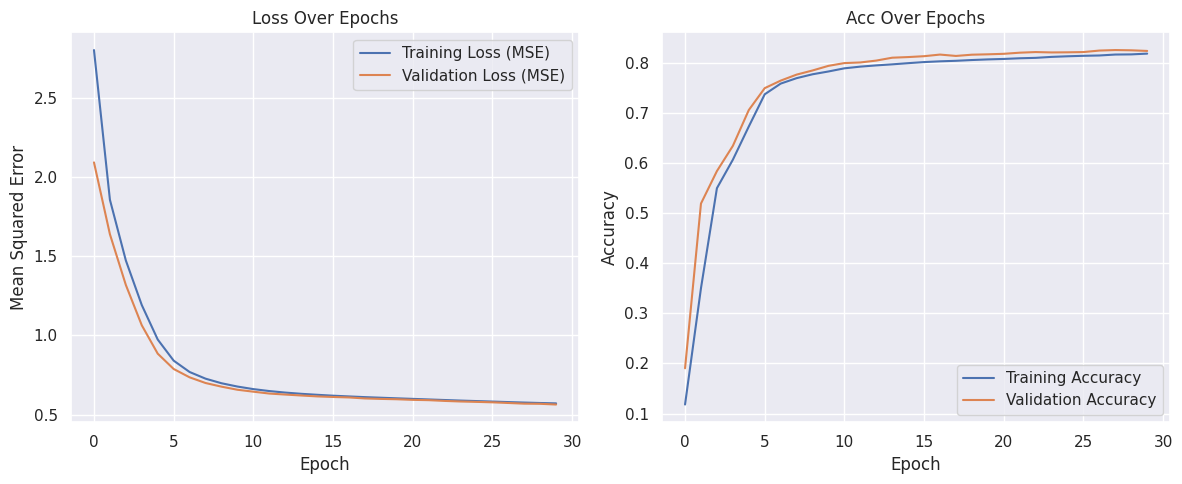

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(first_fc_history.history['loss'], label='Training Loss (MSE)')
plt.plot(first_fc_history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(first_fc_history.history['accuracy'], label='Training Accuracy')
plt.plot(first_fc_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Acc Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
y_test_one_hot = tf.keras.utils.to_categorical(target_test, num_classes=10)

In [30]:
x_test_flat.shape

(6000, 784)

In [31]:
y_test.shape

(10000,)

In [32]:
test_loss, test_accuracy = first_feedforward_model.evaluate(x_test_flat, y_test_one_hot)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
y_test_pred = first_feedforward_model.predict(x_test_flat)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8254 - loss: 0.5583
Test Loss: 0.5872
Test Accuracy: 0.8150
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


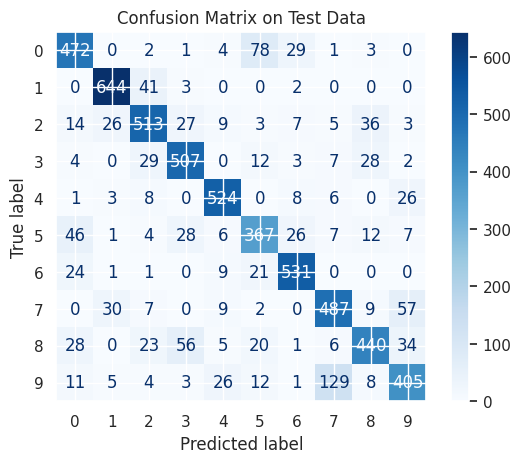

In [35]:
cm = confusion_matrix(y_test_classes, y_test_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix on Test Data')
plt.show()

In [36]:
encoder2 = tf.keras.Model(inputs2, encoder2_second_layer, name='frozen_encoder2')
encoder2.trainable = False
print("Encoder trainable status:", encoder2.trainable)
for layer in encoder2.layers:
    print(f"{layer.name}: {layer.trainable}")
new_inputs2 = tf.keras.Input(shape=(784,), name='new_input2_layer')
encoded_output2 = encoder2(new_inputs2)

Encoder trainable status: False
input_layer: False
first_encoder_dense: False
second_encoder_dense: False


In [37]:
dense2_output = tf.keras.layers.Dense(10 , activation='softmax')(encoded_output2)

In [38]:
second_feedforward_model = tf.keras.Model(new_inputs2, dense2_output, name='second_model_with_frozen_encoder')
second_feedforward_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
second_fc_history = second_feedforward_model.fit(x_train_flat, y_train_one_hot,
              epochs=30,
              batch_size=256,
              shuffle=True,
              validation_data=(x_valid_flat, target_validation_one_hot))

second_feedforward_model.summary()

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1005 - loss: 5.3286 - val_accuracy: 0.1440 - val_loss: 3.3342
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1478 - loss: 2.9549 - val_accuracy: 0.2107 - val_loss: 2.3258
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2372 - loss: 2.1765 - val_accuracy: 0.3322 - val_loss: 1.8602
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3761 - loss: 1.7686 - val_accuracy: 0.4425 - val_loss: 1.5614
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4806 - loss: 1.5059 - val_accuracy: 0.5350 - val_loss: 1.3675
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5682 - loss: 1.3369 - val_accuracy: 0.6100 - val_loss: 1.2361
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6238 - loss: 1.2199 - val_accuracy: 0.6467 - val_loss: 1.1437
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6560 - loss: 1.1437 - val_accuracy: 0.

Model: "second_model_with_frozen_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ new_input2_layer (InputLayer)        │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ frozen_encoder2 (Functional)         │ (None, 4)                   │         100,996 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,148 (395.11 KB)

 Trainable params: 50 (200.00 B)

 Non-trainable params: 100,996 (394.52 KB)

 Optimizer params: 102 (412.00 B)

In [ ]:
#second_fc_history.history

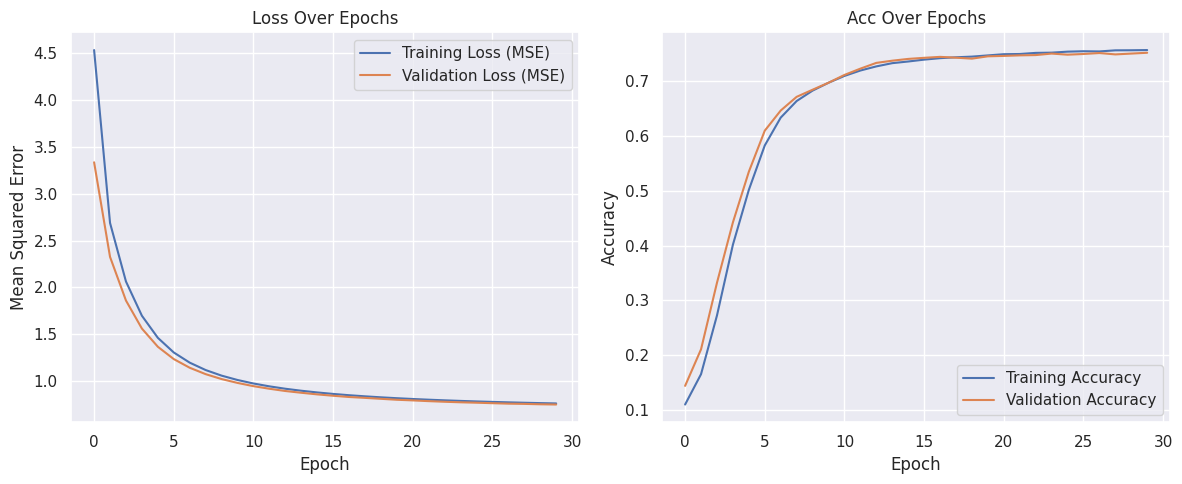

In [39]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(second_fc_history.history['loss'], label='Training Loss (MSE)')
plt.plot(second_fc_history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(second_fc_history.history['accuracy'], label='Training Accuracy')
plt.plot(second_fc_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Acc Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
test_loss, test_accuracy = second_feedforward_model.evaluate(x_test_flat, y_test_one_hot)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
y_test_pred = second_feedforward_model.predict(x_test_flat)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7667 - loss: 0.7587
Test Loss: 0.7785
Test Accuracy: 0.7597
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


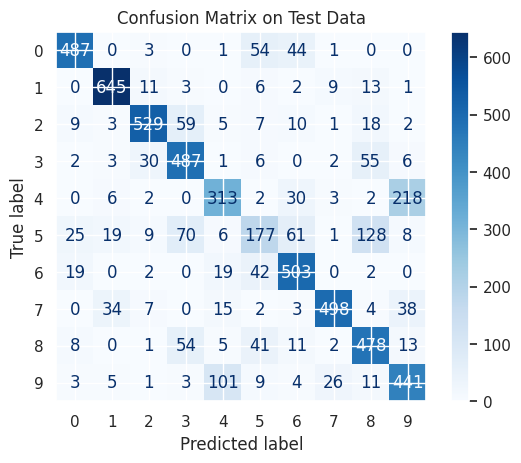

In [41]:
cm = confusion_matrix(y_test_classes, y_test_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix on Test Data')
plt.show()